# Инициализация весов

Одним из способов борьбы с затухающим градиентом является правильная **инициализация весов**. Как это сделать?

**Идея 1:** инициализировать все веса константой.

Проблема: градиент по всем весам будет одинаков, как и обновление весов. Все нейроны в слое будут учить одно и то же, или, в случае $\text{const} = 0$ и активации $\text{ReLU}$, [не будут учиться вообще ✏️[blog]](https://habr.com/ru/post/592711/).

**Вывод:** в качестве начальных весов нужно выбирать различные значения.

**Идея 2:** инициализировать веса нормальным (Гауссовским) шумом с матожиданием $0$ и маленькой дисперсией.

Маленькая дисперсия нужна, чтобы не получить огромные градиенты за большие изначальные ошибки в предсказании.

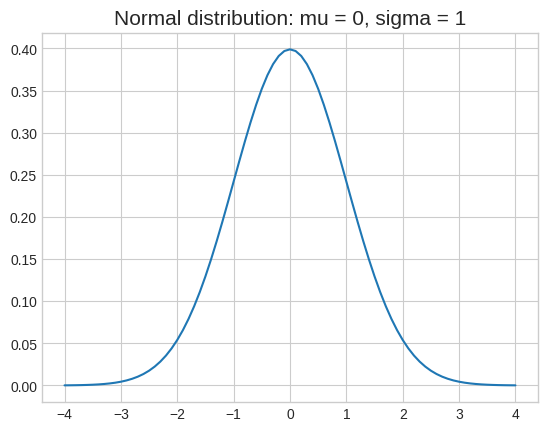

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal distribution: mu = 0, sigma = 1

x = np.arange(-4, 4.1, 0.1)
y = np.exp(-np.square(x) / 2) / np.sqrt(2 * np.pi)

plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Normal distribution: mu = 0, sigma = 1", size=15)
plt.plot(x, y)
plt.show()

**Проблема:** инициализация нормальным шумом не гарантирует отсутствие взрыва или затухания градиета.

**Идея 3:** формализуем условия, при которых взрыв или затухание градиентов не будут происходить.

1. Нам бы хотелось, чтобы **дисперсии признаков**, получаемых на каждом слое, были одинаковы (т.е мы хотим задать начальные веса таким образом, чтобы входные признаки каждого линейного слоя были **одинаково нормализованы**).

Это важно, т.к. значения признаков используются при расчете градиента. Например, для линейного слоя:

$$y = wx+b,$$

$$\dfrac{\partial y} {\partial w} = x.$$

Запишем это условие:

$$Dz^i = Dz^j. \tag{1}$$

2. Нам бы хотелось, чтобы **дисперсии градиентов** для разных слоев были одинаковы:

$$D\dfrac {\partial L} {\partial z^i} = D\dfrac {\partial L} {\partial z^j}. \tag{2}$$


При выполнении этих условий градиент **не затухает** и **не взрывается**.

Инициализации Ксавье и Каймин Хе пытаются выполнить эти условия.

### Инициализация Ксавье (Xavier Glorot)

Рассмотрим функцию активации гиперболический тангенс (tanh).

<img src ="https://edunet.kea.su/repo/EduNet-additions/L07/simple_nn_with_tanh.png" width="600">

Это [нечетная функция 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A7%D1%91%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8) с единичной производной в нуле. Функция и ее производная изображены ниже.

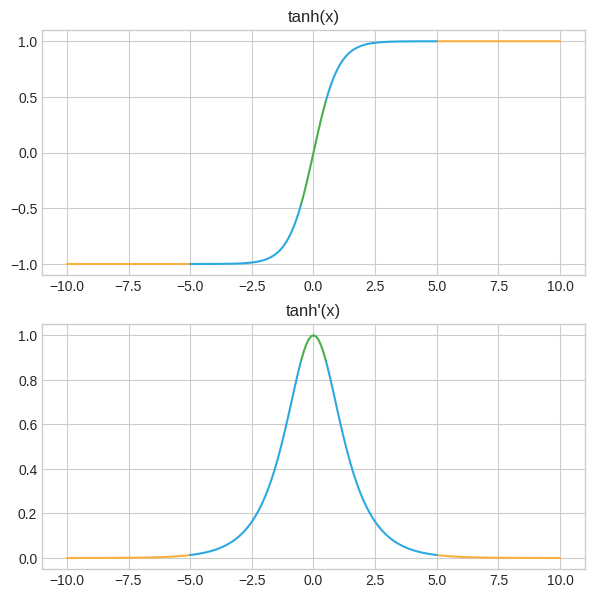

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10.1, 0.1)
y = np.tanh(x)
dy = 1 / np.cosh(x)

plt.style.use("seaborn-v0_8-whitegrid")
fig, (im1, im2) = plt.subplots(2, 1, figsize=(7, 7))
im1.set(title="tanh(x)")

# fmt: off
im1.plot(x[0:51], y[0:51], "#F9B041",
         x[150:201], y[150:201], "#F9B041",
         x[50:96], y[50:96], "#2DA9E1",
         x[105:151], y[105:151], "#2DA9E1",
         x[95:106], y[95:106], "#4AAE4D",)
im1.grid(True)
im2.set(title="tanh'(x)")
im2.plot(x[0:51], dy[0:51], "#F9B041",
         x[150:201], dy[150:201], "#F9B041",
         x[50:96], dy[50:96], "#2DA9E1",
         x[105:151], dy[105:151], "#2DA9E1",
         x[95:106], dy[95:106], "#4AAE4D",)
# fmt: on

im2.grid(True)
plt.show()

При выборе весов нам важно не попасть в <font color='#F9B041'>**оранжевые**</font> зоны с почти нулевой производной, т.к. в этих областях градиент затухает. Мы хотим инициализировать веса таким образом, чтобы признаки, поступающие на слой активации, находились в <font color='#4AAE4D'>**зеленой**</font> области в окрестности нуля. Матожидание признаков, поступающих на слой активации, будет равно нулю:

$$E(z^i_t w_{kt})=0 \tag{3}.$$



Выход слоя активации на текущем слое будет зависеть от выхода слоя активации на предыдущем:

$$z^{i+1} = f(z^iW^i). \tag{4}$$

В окрестности нуля функцию гиперболический тангенс можно считать [линейной 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0):

$$z^{i+1} \approx z^i W^i \tag{5}.$$

Матожидание выхода функции активации также равно нулю:

$$E(z^i_t)=0 \tag{6}$$

Значения весов в слоях будут генерироваться генератором случайных чисел, поэтому веса в различных слоях можно считать независимыми случайными величинами. Для независимых случайных величин выполняются формулы:
1. Дисперсия суммы двух независимых величин:

$$D(\eta + \gamma) = D\eta + D\gamma \tag{7}.$$

2. Дисперсия произведения двух независимых величин:

$$D\eta\gamma = E(\eta\gamma)^2 - (E\eta\gamma)^2 = E\eta^2E\gamma^2 - (E\eta)^2(E\gamma)^2 \tag{8}.$$


Распишем условие $(1)$ с использованием $(5)$ и $(7)$:

$$D(z^{i+1}_{k}) = D(\sum_t z^i_t w_{kt}) = \sum_t D(z^i_t w_{kt}) \tag{9}$$

Дисперсии признаков на входе функции активации берем одинаковые:

$$D(z^{i+1}_{k}) = n D(z^i_0 w_{k0}),\tag{10}$$

где $n$ — размерность выхода слоя.

Применяем нашу формулу $(8)$ и получаем:

$$D(z^{i+1}_{k}) = n [E(z^i_0)^2E(w_{k0})^2 - (Ez^i_0)^2(Ew_{k0})^2]. \tag{11}$$

Используем $(6)$:

$$D(z^{i+1}_{k}) =   n E(z^i_0)^2E(w_{k0})^2. \tag{12}$$

Матожидание выходов активаций и весов равны 0. Из этого:

$$D(z^{i}_{0}) = E(z^{i}_{0})^2 - (Ez^{i}_{0})^2 = E(z^{i}_{0})^2, \tag{13}$$

$$D(w_{k0}) = E(w_{k0})^2 - (Ew_{k0})^2 = E(w_{k0})^2.$$


Подставляем в $(12)$:

$$D(z^{i+1}_{k}) = n D(z^i_0)D(w_{k0}). \tag{14}$$

Из $(14)$ следует формула для зависимости выхода активаций любого слоя от весов предыдущих слоев и дисперсии исходных данных:

$$Dz^i = Dx \prod_{p=0}^{i-1}n_pDW^p, \tag{15}$$

где $n_p$ — размерность выхода $p$-го слоя.

Аналогично можно вывести формулу для градиентов по активациям:

$$D(\dfrac {\delta L} {\delta z^i}) = D(\dfrac {\delta L} {\delta z^d} ) \prod_{p=i}^{d}n_{p+1}DW^p. \tag{16}$$

Вспоминаем условия $(1)$, $(2)$:

$$Dz^i = Dz^j \tag{1},$$

$$D\dfrac {\delta L} {\delta z^i} = D\dfrac {\delta L} {\delta z^j} \tag{2}.$$

С учетом $(15)$, $(16)$ они эквивалентны условиям:

$$n_iDW^i = 1 \tag{17}$$

$$n_{i+1}DW^i = 1 \tag{18}$$

Условия могут быть невыполнимы одновременно:

$$n_i \ne n_{i+1}. $$

Возьмем компромисс — среднее гармоническое решений первого и второго уравнения:

$$DW^i = \dfrac 2 {n_i + n_{i+1}} \tag{19}.$$

**Итого:** нам нужно инициализировать веса нейронов случайными величинами со следующими матожиданием и дисперсией:

$$ EW^i = 0,$$

$$DW^i = \dfrac 2 {n_i + n_{i+1}}.$$

Мы можем взять [равномерное распределение 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5). Именно такое распределение было предложено в [Understanding the difficulty of training deep feedforward neural networks 🎓[article]](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf):

$$W_i \sim U[a, b ],$$

где $a=-b$, так как матожидание равно $0$.

Дисперсия распределения выражается формулой:

$$D(U[a, b]) = \dfrac 1 {12} (b -a)^2 = \dfrac 4 {12} b^2 = \dfrac 1 {3} b^2.$$

Получим:

$$ b = \sqrt{\dfrac {6} {n_i + n_{i + 1}}}.$$

**Итого:**

$$W_i \sim U[-\sqrt{\dfrac {6} {n_i + n_{i + 1}}}, \sqrt{\dfrac {6} {n_i + n_{i + 1}}}],$$

где $n_i$ — размерность выхода $i$-го слоя.



Можно использовать и другие распределения, например, [нормальное 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5). Для него получится:

$$W_i \sim N (0, \text{std} = \sqrt{\dfrac{2}{n_i + n_{i + 1}}})$$

Результат получится аналогичный.

Чтобы понять, что происходит с выходами слоя активации при использовании инициализации Xavier, рассмотрим картинку из оригинальной статьи:

[[article] 🎓 Understanding the difficulty of training deep feedforward neural networks (Xavier, Yoshua, 2010)](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf):

<center><img src ="https://edunet.kea.su/repo/EduNet-additions/L07/xavier_procentile_and_deviation_with_and_without_init.png" width="600"></center>

<center><em>Source: <a href="http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf">Understanding the difficulty of training deep feedforward neural networks</a></em></center>

На картинке изображена зависимость 98-[процентиля 📚[wiki]](https://en.wikipedia.org/wiki/Percentile) (отдельные маркеры) и стандартного отклонения (соединенные маркеры) значений на выходе слоя активации $\text{tanh}$ от эпохи обучения для различных слоев нейросети.

Верхнее изображение — инициализация весов с помощью нормального распределения $W_i \sim U[-\dfrac {1} {\sqrt{n_i}}, \dfrac {1} {\sqrt{n_i}} ]$. Нижнее — с использованием инициализации Xavier.

На верхнем изображении видно, как значения $98$-процентиля уходят в значения $+1$ и $-1$ (сначала на выходе первого слоя, потом на выходе второго и т.д.). Это значит, что для части нейронов происходит затухание градиентов (они переходят в область, отмеченную на графиках $\text{tanh}(x)$, $\text{tanh}’(x)$ <font color='#F9B041'>**оранжевым**</font>  и перестают учиться). На нижней картинке такого не происходит.

Xavier используется для симметричных функций активаций, таких как **tanh** и **sigmoid**.


Вообще говоря, коэффициенты в инициализациях (числитель в формуле для дисперсии) зависят от конкретной **выбранной функции активации**.
В PyTorch есть [функции 🛠️[doc]](https://pytorch.org/docs/stable/nn.init.html) для вычисления этих коэффициентов.


## Инициализация Каймин Хе (Kaiming He)

Для функции активации  ReLU и ее модификаций (PReLU, Leaky ReLU и т.д.) аналогично инициализации Xavier можно расписать условия $(1)$, $(2)$. Так вводится He-инициализация.

Аналогично выводу для Xavier получаем выражения:

$$Dz^i = Dx \prod_{p=0}^{i-1}\dfrac 1 2 n_pDW^p $$

$$D(\dfrac {\delta L} {\delta z^i}) = D(\dfrac {\delta L} {\delta z^d} ) \prod_{p=i}^{d}\dfrac 1 2 n_{p+1}DW^p $$

где $n_p$ — размерность выхода слоя $p$-го слоя.

Условия $(1)$, $(2)$ эквивалентны условиям:

$$  \dfrac {n_iDW^i} {2}  = 1, $$

$$\dfrac {n_{i+1}DW^i} {2} = 1.$$

Можно опять взять среднее гармоническое. Но на практике берут либо $ \dfrac 2 {n_i}$, либо $\dfrac 2 {n_i + 1}$.

Итого получим:

$$W^i \sim N(0, \text{std}=\sqrt{\frac 2 n_i}).$$

Более подробно о выводе инициализации Каймин Хе:

[[arxiv] 🎓 Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (He et al., 2015)](https://arxiv.org/pdf/1502.01852v1.pdf)

## Ортогональная инициализация

Другой идеей является **ортогональная инициализация**.
[Преобразование 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B5_%D0%BE%D1%82%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5), заданное [ортогональной матрицей 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9E%D1%80%D1%82%D0%BE%D0%B3%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0), **не изменяет расстояние между точками**. Можно представить **ортогональную матрицу** как [матрицу поворота 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%BF%D0%BE%D0%B2%D0%BE%D1%80%D0%BE%D1%82%D0%B0) (это не совсем верно, т.к. матрицы перестановки тоже ортогональны), т.е. линейный слой будет **разворачивать** карту признаков, чтобы собирать их линейные комбинации, **не изменяя масштаб признаков**.


Для каждого слоя мы убеждаемся, что изначальная матрица весов является ортогональной.

Выберем ортогональную матрицу весов:

$$W: WW^T = 1.$$

Тогда:
1. Норма активации сохраняется (активации между слоями остаются в одном масштабе):

$$||s_{i+1}|| = ||W_{i}s_i|| = ||s_i||.$$

2. Все нейроны делают «разные» преобразования:

$$ ⟨W_i, W_j⟩ = 0, i \ne j,$$

$$ ⟨W_i, W_j⟩ = 1, i = j.$$


Замечание: т.к. ортогональные матрицы бывают только квадратные, то этот метод подходит только для слоев с одинаковым количеством входных и выходных значений.


Иногда такая инициализация обеспечивает значительно лучшую сходимость. Подробнее:

[[arxiv] 🎓 Exact solutions to the nonlinear dynamics of learning in
deep linear neural networks (Saxe et al., 2014)](https://arxiv.org/pdf/1312.6120.pdf)